<a href="https://colab.research.google.com/github/VishnuJG/ML-DS/blob/main/Forecasting_Corona_Cases_for_World_and_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Vishnu SmartKnower/Final Project/owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72096 entries, 0 to 72095
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               72096 non-null  object 
 1   continent                              68516 non-null  object 
 2   location                               72096 non-null  object 
 3   date                                   72096 non-null  object 
 4   total_cases                            71132 non-null  float64
 5   new_cases                              71130 non-null  float64
 6   new_cases_smoothed                     70129 non-null  float64
 7   total_deaths                           62042 non-null  float64
 8   new_deaths                             62200 non-null  float64
 9   new_deaths_smoothed                    70129 non-null  float64
 10  total_cases_per_million                70743 non-null  float64
 11  ne

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [5]:
df_new=df[["new_vaccinations","iso_code","continent","date","new_cases","new_deaths","location","total_cases","total_deaths","reproduction_rate","icu_patients","hosp_patients","total_tests","positive_rate","total_vaccinations","people_vaccinated","population"]]

In [6]:
df_new.head()

,new_vaccinations,iso_code,continent,date,new_cases,new_deaths,location,total_cases,total_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,positive_rate,total_vaccinations,people_vaccinated,population
0,NaN,AFG,Asia,2020-02-24,1.0,NaN,Afghanistan,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
1,NaN,AFG,Asia,2020-02-25,0.0,NaN,Afghanistan,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
2,NaN,AFG,Asia,2020-02-26,0.0,NaN,Afghanistan,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
3,NaN,AFG,Asia,2020-02-27,0.0,NaN,Afghanistan,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
4,NaN,AFG,Asia,2020-02-28,0.0,NaN,Afghanistan,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0


In [7]:
df_new.fillna("0",inplace=True)
df_new.tail()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,new_vaccinations,iso_code,continent,date,new_cases,new_deaths,location,total_cases,total_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,positive_rate,total_vaccinations,people_vaccinated,population
72091,3135,ZWE,Africa,2021-02-25,34,2,Zimbabwe,35994,1458,0.61,0,0,376803,0.034,11007,11007,1.48629e+07
72092,1572,ZWE,Africa,2021-02-26,50,5,Zimbabwe,36044,1463,0.6,0,0,378944,0.026,12579,12579,1.48629e+07
72093,3126,ZWE,Africa,2021-02-27,14,0,Zimbabwe,36058,1463,0.6,0,0,380246,0.022,15705,15705,1.48629e+07
72094,3138,ZWE,Africa,2021-02-28,31,0,Zimbabwe,36089,1463,0.6,0,0,381160,0.023,18843,18843,1.48629e+07
72095,2613,ZWE,Africa,2021-03-01,26,5,Zimbabwe,36115,1468,0,0,0,0,0,21456,21456,1.48629e+07


In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72096 entries, 0 to 72095
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   new_vaccinations    72096 non-null  object
 1   iso_code            72096 non-null  object
 2   continent           72096 non-null  object
 3   date                72096 non-null  object
 4   new_cases           72096 non-null  object
 5   new_deaths          72096 non-null  object
 6   location            72096 non-null  object
 7   total_cases         72096 non-null  object
 8   total_deaths        72096 non-null  object
 9   reproduction_rate   72096 non-null  object
 10  icu_patients        72096 non-null  object
 11  hosp_patients       72096 non-null  object
 12  total_tests         72096 non-null  object
 13  positive_rate       72096 non-null  object
 14  total_vaccinations  72096 non-null  object
 15  people_vaccinated   72096 non-null  object
 16  population          72

In [9]:
df_new.date=pd.to_datetime(df_new.date,format="%Y-%m-%d")


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
df_new.date

0       2020-02-24
1       2020-02-25
2       2020-02-26
3       2020-02-27
4       2020-02-28
           ...    
72091   2021-02-25
72092   2021-02-26
72093   2021-02-27
72094   2021-02-28
72095   2021-03-01
Name: date, Length: 72096, dtype: datetime64[ns]

In [11]:
df_ind=df_new[df_new.location=='India']
df_ind

,new_vaccinations,iso_code,continent,date,new_cases,new_deaths,location,total_cases,total_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,positive_rate,total_vaccinations,people_vaccinated,population
29608,0,IND,Asia,2020-01-30,1,0,India,1,0,0,0,0,0,0,0,0,1.38e+09
29609,0,IND,Asia,2020-01-31,0,0,India,1,0,0,0,0,0,0,0,0,1.38e+09
29610,0,IND,Asia,2020-02-01,0,0,India,1,0,0,0,0,0,0,0,0,1.38e+09
29611,0,IND,Asia,2020-02-02,1,0,India,2,0,0,0,0,0,0,0,0,1.38e+09
29612,0,IND,Asia,2020-02-03,1,0,India,3,0,0,0,0,0,0,0,0,1.38e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30000,700414,IND,Asia,2021-02-25,16577,120,India,1.10635e+07,156825,1.09,0,0,0,0,1.3067e+07,1.12062e+07,1.38e+09
30001,689893,IND,Asia,2021-02-26,16488,113,India,1.108e+07,156938,1.09,0,0,0,0,1.37569e+07,1.15529e+07,1.38e+09
30002,485607,IND,Asia,2021-02-27,16752,113,India,1.10967e+07,157051,1.09,0,0,0,0,1.42425e+07,1.17887e+07,1.38e+09
30003,58719,IND,Asia,2021-02-28,15510,106,India,1.11122e+07,157157,1.09,0,0,0,0,1.43013e+07,1.18451e+07,1.38e+09


In [12]:
df_ind.rename(columns={"new_cases":"y","date":"ds"},inplace=True)
df_india_store=df_ind
df_ind

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,new_vaccinations,iso_code,continent,ds,y,new_deaths,location,total_cases,total_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,positive_rate,total_vaccinations,people_vaccinated,population
29608,0,IND,Asia,2020-01-30,1,0,India,1,0,0,0,0,0,0,0,0,1.38e+09
29609,0,IND,Asia,2020-01-31,0,0,India,1,0,0,0,0,0,0,0,0,1.38e+09
29610,0,IND,Asia,2020-02-01,0,0,India,1,0,0,0,0,0,0,0,0,1.38e+09
29611,0,IND,Asia,2020-02-02,1,0,India,2,0,0,0,0,0,0,0,0,1.38e+09
29612,0,IND,Asia,2020-02-03,1,0,India,3,0,0,0,0,0,0,0,0,1.38e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30000,700414,IND,Asia,2021-02-25,16577,120,India,1.10635e+07,156825,1.09,0,0,0,0,1.3067e+07,1.12062e+07,1.38e+09
30001,689893,IND,Asia,2021-02-26,16488,113,India,1.108e+07,156938,1.09,0,0,0,0,1.37569e+07,1.15529e+07,1.38e+09
30002,485607,IND,Asia,2021-02-27,16752,113,India,1.10967e+07,157051,1.09,0,0,0,0,1.42425e+07,1.17887e+07,1.38e+09
30003,58719,IND,Asia,2021-02-28,15510,106,India,1.11122e+07,157157,1.09,0,0,0,0,1.43013e+07,1.18451e+07,1.38e+09


In [13]:
df_fore=df_ind[['ds','y']]
df_fore

,ds,y
29608,2020-01-30,1
29609,2020-01-31,0
29610,2020-02-01,0
29611,2020-02-02,1
29612,2020-02-03,1
...,...,...
30000,2021-02-25,16577
30001,2021-02-26,16488
30002,2021-02-27,16752
30003,2021-02-28,15510


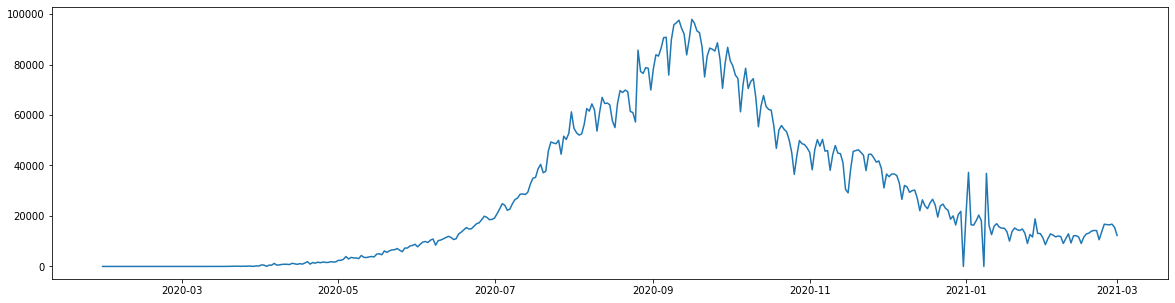

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df_fore.ds,df_fore.y)
plt.show()

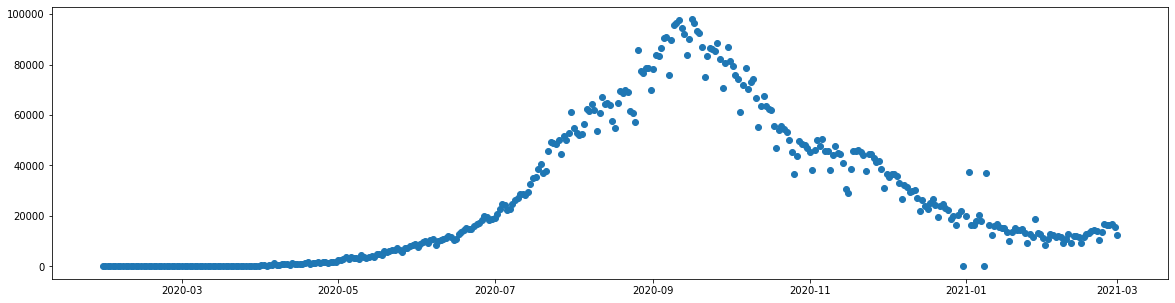

In [15]:
plt.figure(figsize=(20,5))
plt.scatter(df_fore.ds,df_fore.y)
plt.show()

In [16]:
import fbprophet
op=fbprophet.Prophet()

In [17]:
op.fit(df_fore)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
forecast=op.make_future_dataframe(periods=1,freq='d')

In [19]:
forecast=op.predict(forecast)

In [20]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [21]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-30,-873.130781,-6810.997058,4596.305291
1,2020-01-31,-617.075048,-5961.390500,5194.867662
2,2020-02-01,283.575702,-5422.290591,5715.656643
3,2020-02-02,-1797.889827,-7040.569907,3640.535990
4,2020-02-03,-5335.235238,-11198.393333,262.579157
...,...,...,...,...
393,2021-02-26,8689.183281,3229.908494,13974.065525
394,2021-02-27,9294.095724,3626.377599,15128.060165
395,2021-02-28,6916.891887,1177.778670,12388.661218
396,2021-03-01,3083.808170,-2807.036672,8924.671440


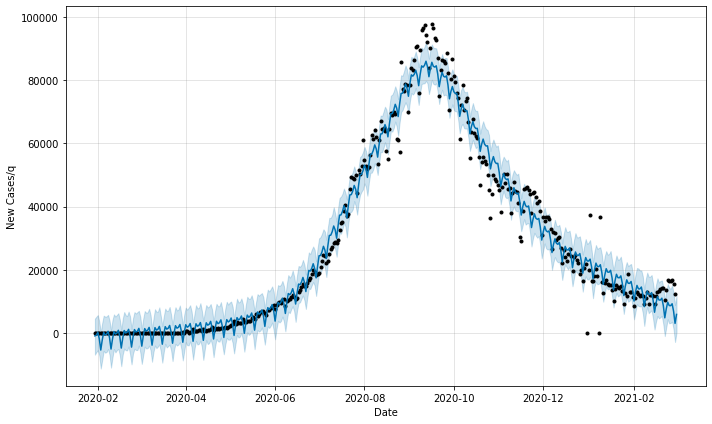

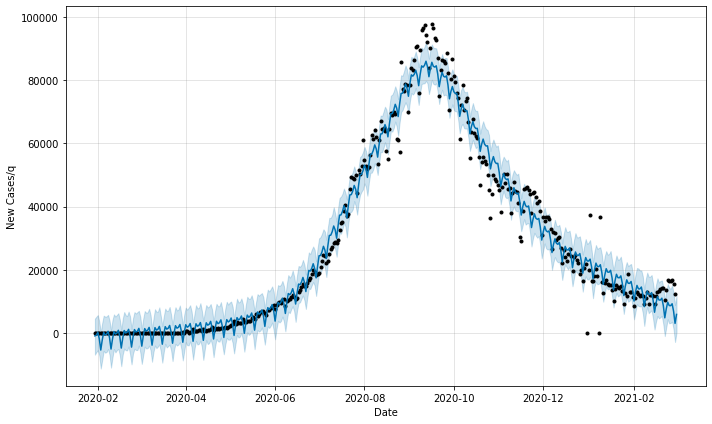

In [22]:
op.plot(forecast,xlabel='Date',ylabel='New Cases/q')

In [23]:
df_new

,new_vaccinations,iso_code,continent,date,new_cases,new_deaths,location,total_cases,total_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,positive_rate,total_vaccinations,people_vaccinated,population
0,0,AFG,Asia,2020-02-24,1,0,Afghanistan,1,0,0,0,0,0,0,0,0,3.89283e+07
1,0,AFG,Asia,2020-02-25,0,0,Afghanistan,1,0,0,0,0,0,0,0,0,3.89283e+07
2,0,AFG,Asia,2020-02-26,0,0,Afghanistan,1,0,0,0,0,0,0,0,0,3.89283e+07
3,0,AFG,Asia,2020-02-27,0,0,Afghanistan,1,0,0,0,0,0,0,0,0,3.89283e+07
4,0,AFG,Asia,2020-02-28,0,0,Afghanistan,1,0,0,0,0,0,0,0,0,3.89283e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72091,3135,ZWE,Africa,2021-02-25,34,2,Zimbabwe,35994,1458,0.61,0,0,376803,0.034,11007,11007,1.48629e+07
72092,1572,ZWE,Africa,2021-02-26,50,5,Zimbabwe,36044,1463,0.6,0,0,378944,0.026,12579,12579,1.48629e+07
72093,3126,ZWE,Africa,2021-02-27,14,0,Zimbabwe,36058,1463,0.6,0,0,380246,0.022,15705,15705,1.48629e+07
72094,3138,ZWE,Africa,2021-02-28,31,0,Zimbabwe,36089,1463,0.6,0,0,381160,0.023,18843,18843,1.48629e+07


In [24]:
df_india_store=df_new[df_new.location=='India']
df_india_store

,new_vaccinations,iso_code,continent,date,new_cases,new_deaths,location,total_cases,total_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,positive_rate,total_vaccinations,people_vaccinated,population
29608,0,IND,Asia,2020-01-30,1,0,India,1,0,0,0,0,0,0,0,0,1.38e+09
29609,0,IND,Asia,2020-01-31,0,0,India,1,0,0,0,0,0,0,0,0,1.38e+09
29610,0,IND,Asia,2020-02-01,0,0,India,1,0,0,0,0,0,0,0,0,1.38e+09
29611,0,IND,Asia,2020-02-02,1,0,India,2,0,0,0,0,0,0,0,0,1.38e+09
29612,0,IND,Asia,2020-02-03,1,0,India,3,0,0,0,0,0,0,0,0,1.38e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30000,700414,IND,Asia,2021-02-25,16577,120,India,1.10635e+07,156825,1.09,0,0,0,0,1.3067e+07,1.12062e+07,1.38e+09
30001,689893,IND,Asia,2021-02-26,16488,113,India,1.108e+07,156938,1.09,0,0,0,0,1.37569e+07,1.15529e+07,1.38e+09
30002,485607,IND,Asia,2021-02-27,16752,113,India,1.10967e+07,157051,1.09,0,0,0,0,1.42425e+07,1.17887e+07,1.38e+09
30003,58719,IND,Asia,2021-02-28,15510,106,India,1.11122e+07,157157,1.09,0,0,0,0,1.43013e+07,1.18451e+07,1.38e+09


In [26]:
df_new.to_csv('all_countries.csv', header=True, index=False)
df_india_store.to_csv("India.csv",header=True,index=False)

In [ ]:
tableau_link="https://public.tableau.com/views/FinalDraft_16153083370010/FinalStory?:language=en&:display_count=y&publish=yes&:origin=viz_share_link"